In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Preparation

In [2]:
df = pd.read_csv("16325569497737558.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.notnull().value_counts()

age   sex   cp    trtbps  chol  fbs   restecg  thalachh  exng  oldpeak  slp   caa   thall  output
True  True  True  True    True  True  True     True      True  True     True  True  True   True      303
Name: count, dtype: int64

### EDA

In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [5]:
df.shape

(303, 14)

In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.corr().style.background_gradient(cmap="coolwarm")

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

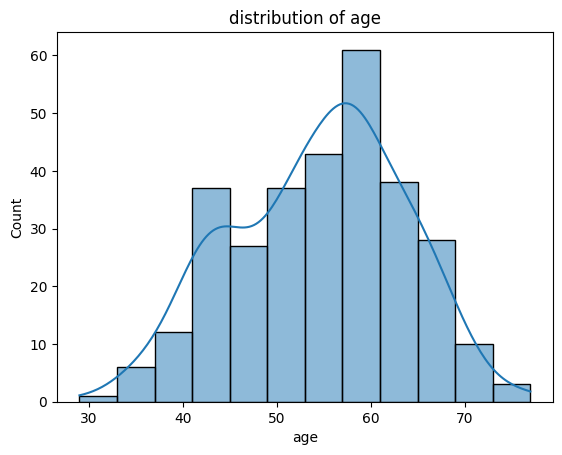

In [9]:
sns.histplot(df["age"] , kde=True)
plt.title("distribution of age")
plt.show()

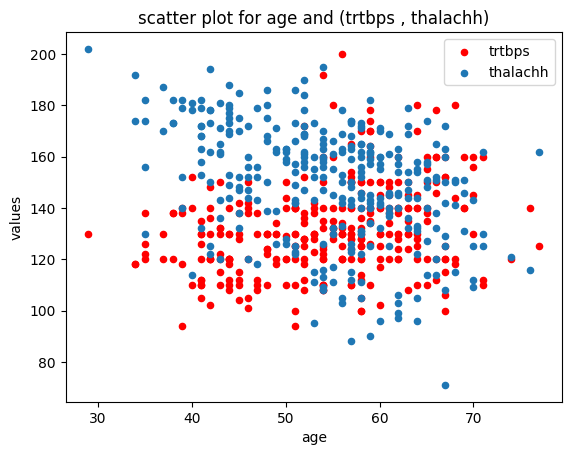

In [10]:
ax = df.plot(x="age" , y="trtbps" , kind="scatter" , color="red" , label = "trtbps")
df.plot(x="age" , y="thalachh" , kind="scatter" , ax=ax , label = "thalachh")

plt.ylabel("values")
plt.xlabel("age")
plt.title("scatter plot for age and (trtbps , thalachh)")

plt.legend()

plt.show()

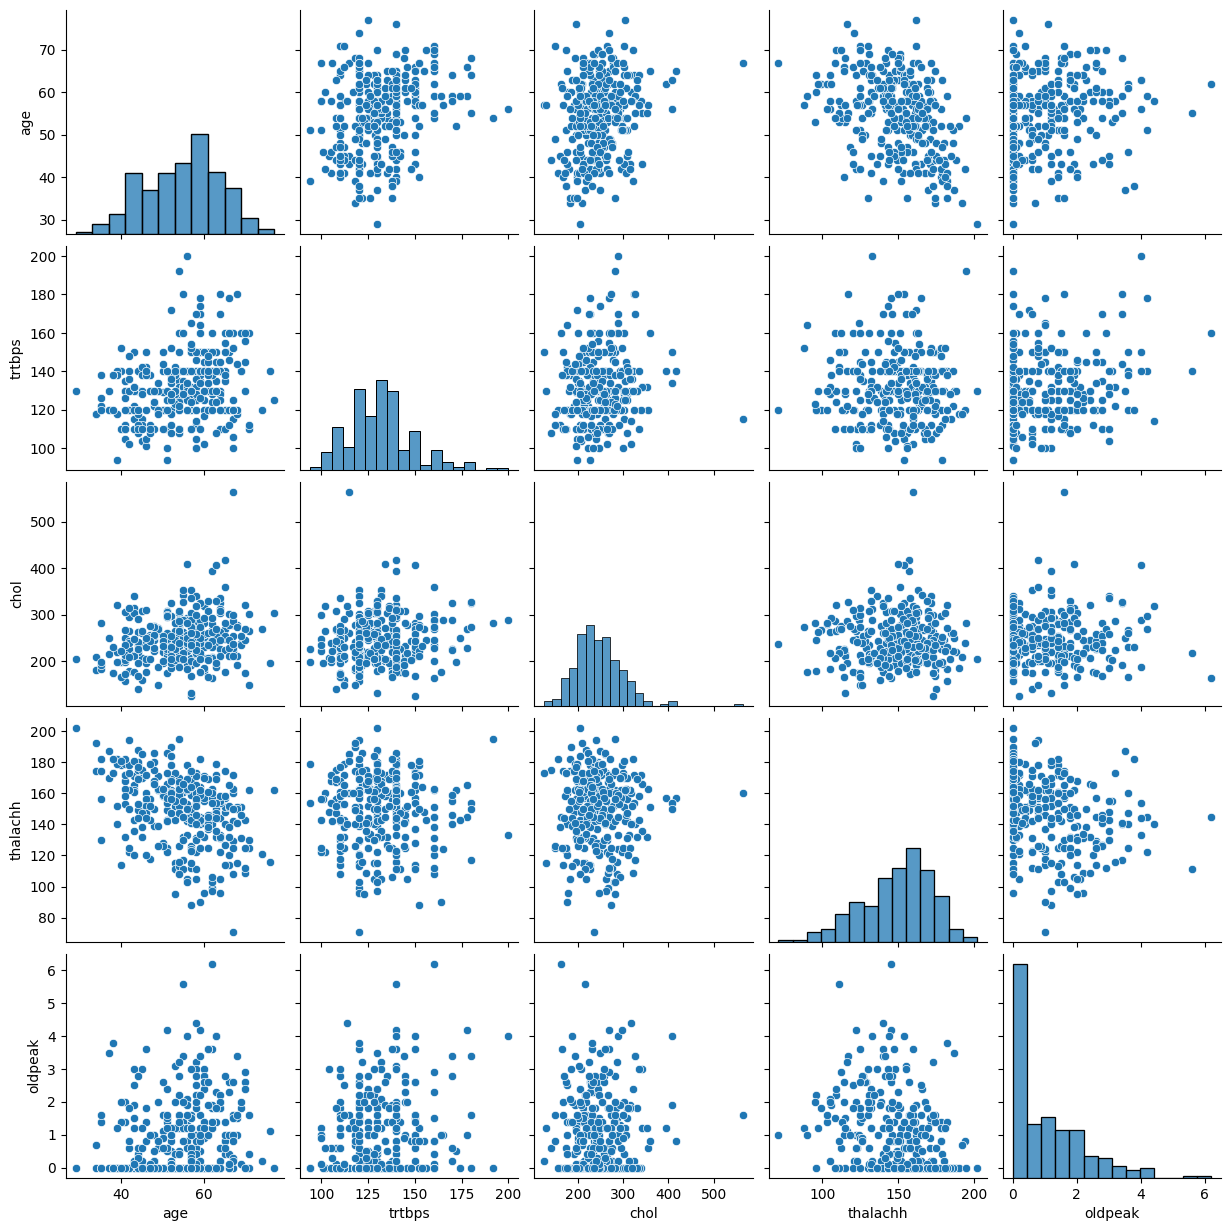

In [11]:
sns.pairplot(df , vars=["age" , "trtbps" , "chol" , "thalachh" , "oldpeak"])

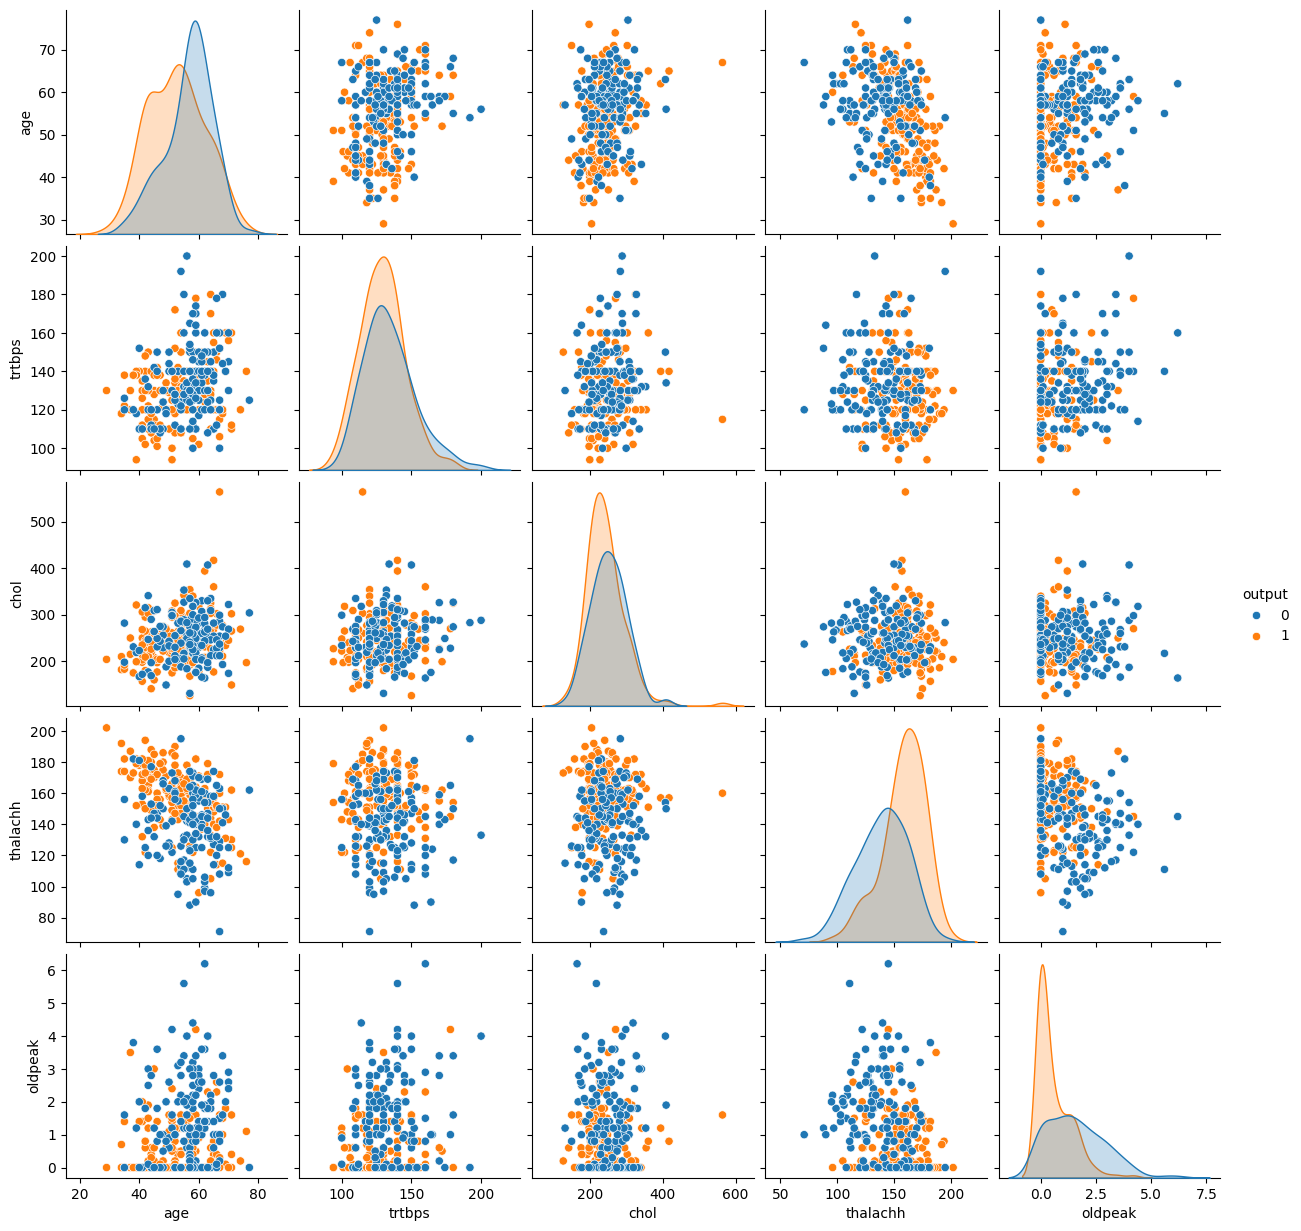

In [12]:
sns.pairplot(df , vars=["age" , "trtbps" , "chol" , "thalachh" , "oldpeak"] , hue="output")

### SVM

In [445]:
X = np.asarray(df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']])
x_norm = StandardScaler().fit_transform(X)
Y = np.asarray(df["output"])
x_train , x_test , y_train , y_test = train_test_split(x_norm , Y , test_size=0.2 , random_state=4)

In [446]:
from sklearn import svm
# kernel = linear c = 0.09
sv = svm.SVC(C=0.15 , kernel="sigmoid")
sv.fit(x_train , y_train)

SVC(C=0.15, kernel='sigmoid')

In [447]:
yhat = sv.predict(x_test)
print(yhat[0:10])
print(y_test[0:10])

[1 0 1 1 1 1 0 1 1 1]
[1 0 1 1 0 0 0 1 1 1]


In [448]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.95      0.80      0.87        25
           1       0.88      0.97      0.92        36

    accuracy                           0.90        61
   macro avg       0.91      0.89      0.90        61
weighted avg       0.91      0.90      0.90        61

Confusion matrix, without normalization
[[20  5]
 [ 1 35]]


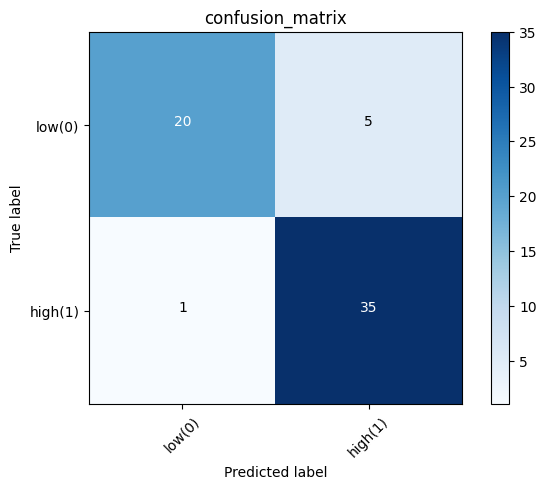

In [449]:
from sklearn.metrics import classification_report , confusion_matrix
cnf_matrix = confusion_matrix(y_test , yhat , labels=[0,1])
np.set_printoptions(precision=2)

print(classification_report(y_test , yhat))

plt.figure()
plot_confusion_matrix(cnf_matrix , classes=["low(0)" , "high(1)"] , normalize=False , title="confusion_matrix")

### KNN

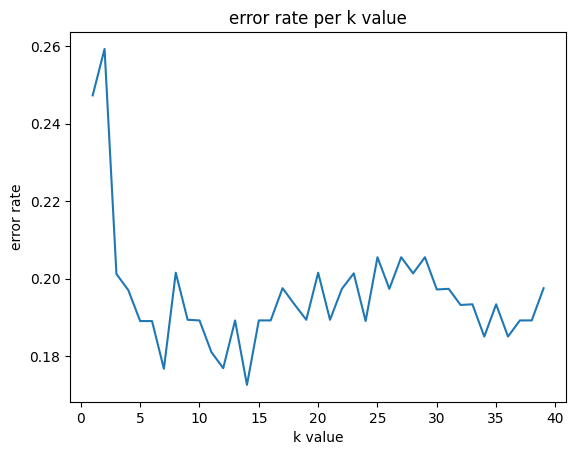

In [464]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
x_train , x_test , y_train , y_test = train_test_split(x_norm , Y , test_size=0.2 , random_state=4)
error_list = []
k = range(1 , 40)
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn , x_train , y_train , cv=10)
    error_list.append(1 - score.mean())

plt.plot(k , error_list)
plt.title("error rate per k value")
plt.xlabel("k value")
plt.ylabel("error rate")
plt.show()

In [488]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train , y_train)
yhat1 = knn.predict(x_test)
print(yhat1[0:10])
print(y_test[0:10])

[1 0 1 1 1 1 0 1 1 1]
[1 0 1 1 0 0 0 1 1 1]


              precision    recall  f1-score   support

           0       0.95      0.72      0.82        25
           1       0.83      0.97      0.90        36

    accuracy                           0.87        61
   macro avg       0.89      0.85      0.86        61
weighted avg       0.88      0.87      0.86        61

Confusion matrix, without normalization
[[18  7]
 [ 1 35]]


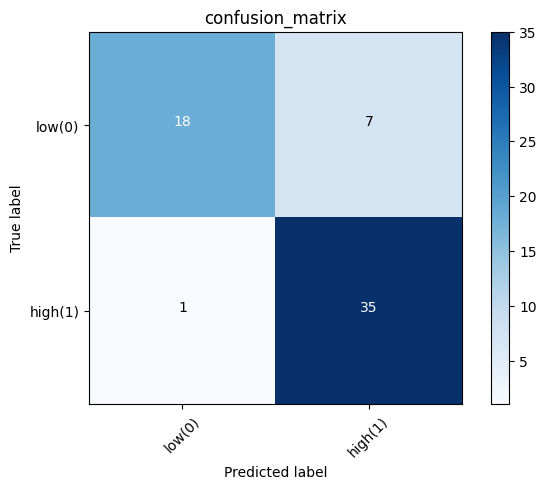

In [489]:
cnf_matrix = confusion_matrix(y_test , yhat1 , labels=[0,1])
np.set_printoptions(precision=2)

print(classification_report(y_test , yhat1))

plt.figure()
plot_confusion_matrix(cnf_matrix , classes=["low(0)" , "high(1)"] , normalize=False , title="confusion_matrix")

### Decision Tree

In [573]:
from sklearn.tree import DecisionTreeClassifier
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state=4)
tree = DecisionTreeClassifier(criterion="entropy" , max_depth=3)
tree.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [574]:
yhat2 = tree.predict(x_test)
print(yhat2[:10])
print(y_test[:10])

[0 0 1 1 1 0 1 1 1 1]
[1 0 1 1 0 0 0 1 1 1]


              precision    recall  f1-score   support

           0       0.86      0.76      0.81        25
           1       0.85      0.92      0.88        36

    accuracy                           0.85        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.85      0.85        61

Confusion matrix, without normalization
[[19  6]
 [ 3 33]]


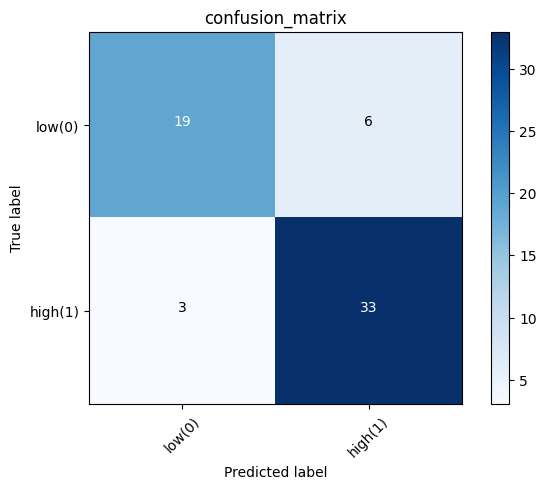

In [575]:
cnf_matrix = confusion_matrix(y_test , yhat2 , labels=[0,1])
np.set_printoptions(precision=2)

print(classification_report(y_test , yhat2))

plt.figure()
plot_confusion_matrix(cnf_matrix , classes=["low(0)" , "high(1)"] , normalize=False , title="confusion_matrix")